# <u>HEART FAILURE PREDICTION CLASSIFICATION</u> 
## PART 1: Exploratory Data Analysis 
### To find correlations between all the features relating to the cause of death by heart failure

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

/home/neosoft/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
ds=pd.read_csv("heart_failure_clinical_records_dataset.csv")
ds.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
ds.shape

(299, 13)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
ds.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [6]:
total_missing = ds.isnull().sum().sum()
print("\nTotal Missing Values:", total_missing)


Total Missing Values: 0


In [7]:
ds.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 1. Univariate Analysis of Binary Variables

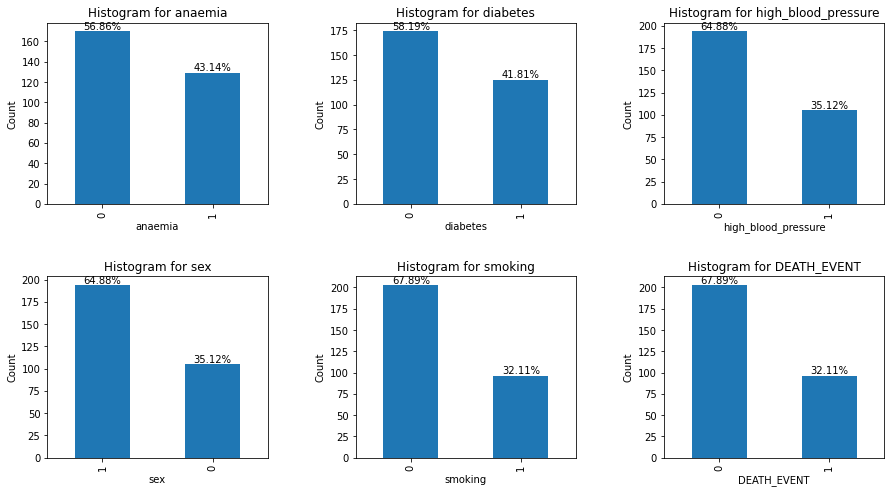

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3
    counts = ds[var].value_counts()
    counts.plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f'Histogram for {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')
    
    # Calculate and display percentages on top of the bars
    total = len(ds)
    for j, count in enumerate(counts):
        percentage = count / total * 100
        axes[row, col].text(j, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


### Insight 1: 
#### 1. 57% of the people under study have aneamic symptoms while 43% are not.
#### 2. 65%  have hypertension or high blood pressure while 35% have normal blood pressure.
#### 3. 58% are diabetic while 42% are not.
#### 4. 65% are male while 35% are female.
#### 5. 68% of the population have smoking habits while 32% don't.
#### 6. 32.11% of the cases succumbed (positive examples) while 67.89% cases survived (negative examples) the condition.

### 1.a. Distribution of Age

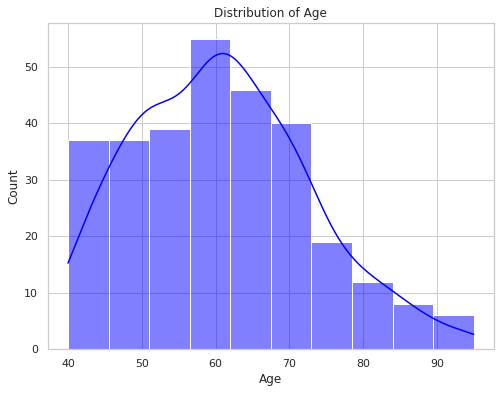

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(ds['age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Insight 2: 
#### The age group of people ranges from 40 - 95 with visible spike in the population density at certain age intervals around [44-46], [50-52], [60-62] (highest density), [64-66], [70-72].

### 1.b. Distribution of Age w.r.t Gender

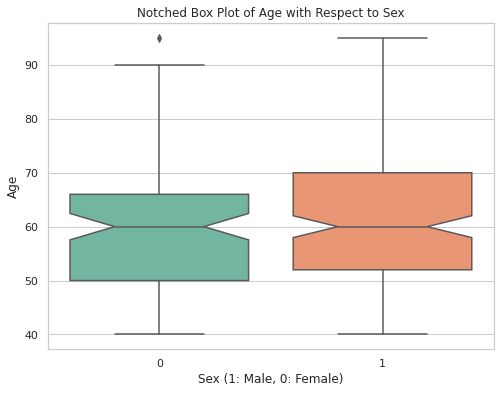

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a notched box plot of age with respect to sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=ds, palette='Set2', notch=True)

# Customize the plot
plt.xlabel('Sex (1: Male, 0: Female)')
plt.ylabel('Age')
plt.title('Notched Box Plot of Age with Respect to Sex')

# Show the plot
plt.show()


### Insight 3:
#### 1. Minimum age is 40 in both males and females.
#### 2. The maximum age is 90 for males and 95 for females.

### 1.c. Effect of age on survival rate

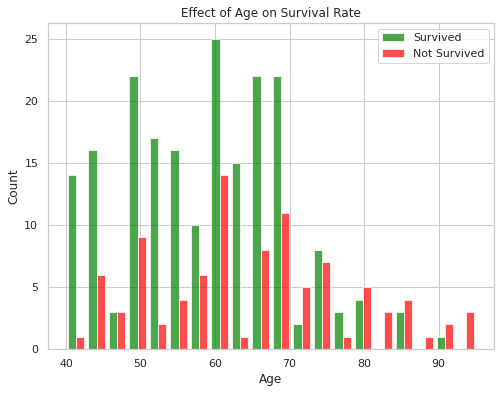

In [11]:

# Data
survived = ds[ds["DEATH_EVENT"] == 0]["age"]
not_survived = ds[ds["DEATH_EVENT"] == 1]["age"]
hist_data = [survived, not_survived]
group_labels = ['Survived', 'Not Survived']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(hist_data, bins=20, color=['green', 'red'], alpha=0.7, label=group_labels)

# Customize the plot
plt.title('Effect of Age on Survival Rate')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()



/home/neosoft/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/neosoft/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


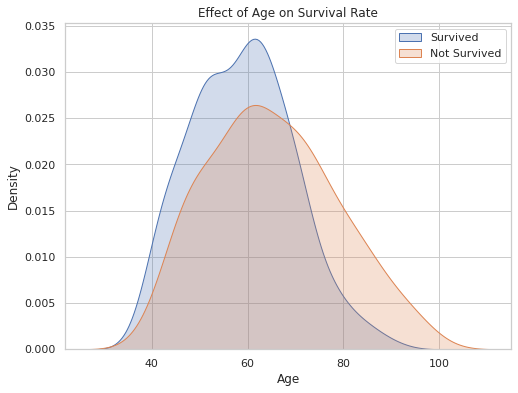

In [12]:
# Data
survived = ds[ds["DEATH_EVENT"] == 0]["age"]
not_survived = ds[ds["DEATH_EVENT"] == 1]["age"]

# Create a distribution plot
plt.figure(figsize=(8, 6))
sns.distplot(survived, hist=False, kde_kws={"shade": True}, label="Survived")
sns.distplot(not_survived, hist=False, kde_kws={"shade": True}, label="Not Survived")

# Customize the plot
plt.title('Effect of Age on Survival Rate')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


### Insight 4: 
#### 1. The survival rate is more within the age group 50 to 70.
#### 2. The chances of not surviving the event of a heart failure happens around all the age group in the population being studied. This is highest around the 60's age group. Above the age of 80, the chances of survival decreases drastically.

### 1.d. Survival Rate w.r.t. Gender

<ipython-input-13-9a69342f855d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survived = male[ds["DEATH_EVENT"] == 0]
<ipython-input-13-9a69342f855d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_not_survived = male[ds["DEATH_EVENT"] == 1]
<ipython-input-13-9a69342f855d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survived = female[ds["DEATH_EVENT"] == 0]
<ipython-input-13-9a69342f855d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_not_survived = female[ds["DEATH_EVENT"] == 1]


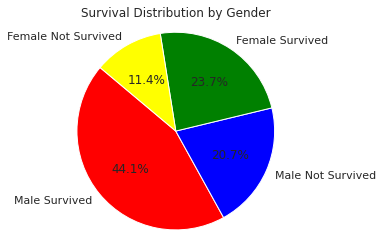

In [13]:
male = ds[ds["sex"] == 1]
female = ds[ds["sex"] == 0]

male_survived = male[ds["DEATH_EVENT"] == 0]
male_not_survived = male[ds["DEATH_EVENT"] == 1]
female_survived = female[ds["DEATH_EVENT"] == 0]
female_not_survived = female[ds["DEATH_EVENT"] == 1]

male_survived_count = len(male_survived)
male_not_survived_count = len(male_not_survived)
female_survived_count = len(female_survived)
female_not_survived_count = len(female_not_survived)

labels = ['Male Survived', 'Male Not Survived', 'Female Survived', 'Female Not Survived']
sizes = [male_survived_count, male_not_survived_count, female_survived_count, female_not_survived_count]
colors = ['red', 'blue', 'green', 'yellow']

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Survival Distribution by Gender')
plt.show()


### Insight 5: 
#### 1. From the above pie chart it is evident that 44.1% (132) of the male population have survived while 20.7% (62) succumbed to the heart failure.
#### 2. Coming to the female population, 23.7% (71) of the population survived the heart failure while 11.4% (34) succumbed to the heart failure.

In [14]:
''' #TRIED PIE CHART, DOES NOT LOOK CLEAN, HENCE OMITTED
#Variables of High BP distribution
hbp_yes = ds[ds["high_blood_pressure"] == 1]
hbp_no = ds[ds["high_blood_pressure"] == 0]

hbp_yes_count = len(hbp_yes)
hbp_no_count = len(hbp_no)

#Variables of  wrt Survival Rate
hbp_yes_survived = hbp_yes[ds["DEATH_EVENT"] == 0]
hbp_yes_not_survived = hbp_yes[ds["DEATH_EVENT"] == 1]
hbp_no_survived = hbp_no[ds["DEATH_EVENT"] == 0]
hbp_no_not_survived = hbp_no[ds["DEATH_EVENT"] == 1]

hbp_yes_survived_count = len(hbp_yes_survived)
hbp_yes_not_survived_count = len(hbp_yes_not_survived)
hbp_no_survived_count = len(hbp_no_survived)
hbp_no_not_survived_count = len(hbp_no_not_survived)
#first pie chart
labels1 = ['Hypertension YES', 'Hypertension NO']
sizes1 = [hbp_yes_count, hbp_no_count]
colors1 = ['red', 'blue']

#second pie chart
labels2 = ['Hypertension YES-Survived', 'Hypertension YES-Not Survived', 'Hypertension NO-Survived', 'Hypertension NO-Not Survived']
sizes2 = [hbp_yes_survived_count, hbp_yes_not_survived_count, hbp_no_survived_count, hbp_no_not_survived_count]
colors2 = ['red', 'blue', 'green', 'yellow']

#figure with subplots using gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Two columns

# To position the first pie chart on the extreme left
ax1 = plt.subplot(gs[0])
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=140)
ax1.set_title('Hypertension Distribution')

# To position the second pie chart on the extreme right
ax2 = plt.subplot(gs[1])
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=140)
ax2.set_title('Hypertension & Survival Rate')

# Equal aspect ratio ensures that pies are drawn as circles
ax1.axis('equal')
ax2.axis('equal')

# Display the pie charts
plt.show()
'''

' #TRIED PIE CHART, DOES NOT LOOK CLEAN, HENCE OMITTED\n#Variables of High BP distribution\nhbp_yes = ds[ds["high_blood_pressure"] == 1]\nhbp_no = ds[ds["high_blood_pressure"] == 0]\n\nhbp_yes_count = len(hbp_yes)\nhbp_no_count = len(hbp_no)\n\n#Variables of  wrt Survival Rate\nhbp_yes_survived = hbp_yes[ds["DEATH_EVENT"] == 0]\nhbp_yes_not_survived = hbp_yes[ds["DEATH_EVENT"] == 1]\nhbp_no_survived = hbp_no[ds["DEATH_EVENT"] == 0]\nhbp_no_not_survived = hbp_no[ds["DEATH_EVENT"] == 1]\n\nhbp_yes_survived_count = len(hbp_yes_survived)\nhbp_yes_not_survived_count = len(hbp_yes_not_survived)\nhbp_no_survived_count = len(hbp_no_survived)\nhbp_no_not_survived_count = len(hbp_no_not_survived)\n#first pie chart\nlabels1 = [\'Hypertension YES\', \'Hypertension NO\']\nsizes1 = [hbp_yes_count, hbp_no_count]\ncolors1 = [\'red\', \'blue\']\n\n#second pie chart\nlabels2 = [\'Hypertension YES-Survived\', \'Hypertension YES-Not Survived\', \'Hypertension NO-Survived\', \'Hypertension NO-Not Survived\

### 1.e. Effect of High BP on Survival Rate

<ipython-input-15-f227aa959ec2>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hbp_yes_survived = hbp_yes[ds["DEATH_EVENT"] == 0]
<ipython-input-15-f227aa959ec2>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hbp_yes_not_survived = hbp_yes[ds["DEATH_EVENT"] == 1]
<ipython-input-15-f227aa959ec2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hbp_no_survived = hbp_no[ds["DEATH_EVENT"] == 0]
<ipython-input-15-f227aa959ec2>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hbp_no_not_survived = hbp_no[ds["DEATH_EVENT"] == 1]


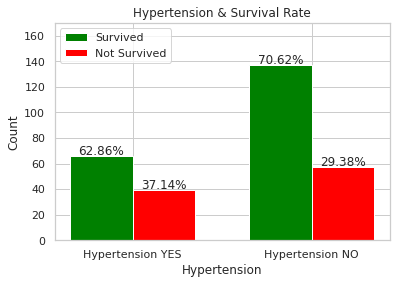

In [15]:
#Variables of High BP distribution
hbp_yes = ds[ds["high_blood_pressure"] == 1]
hbp_no = ds[ds["high_blood_pressure"] == 0]

hbp_yes_count = len(hbp_yes)
hbp_no_count = len(hbp_no)

#Variables of highBP wrt Survival Rate
hbp_yes_survived = hbp_yes[ds["DEATH_EVENT"] == 0]
hbp_yes_not_survived = hbp_yes[ds["DEATH_EVENT"] == 1]
hbp_no_survived = hbp_no[ds["DEATH_EVENT"] == 0]
hbp_no_not_survived = hbp_no[ds["DEATH_EVENT"] == 1]

hbp_yes_survived_count = len(hbp_yes_survived)
hbp_yes_not_survived_count = len(hbp_yes_not_survived)
hbp_no_survived_count = len(hbp_no_survived)
hbp_no_not_survived_count = len(hbp_no_not_survived)

# Data
categories = ['Hypertension YES', 'Hypertension NO']
survived = [hbp_yes_survived_count, hbp_no_survived_count]
not_survived = [hbp_yes_not_survived_count, hbp_no_not_survived_count]

total_survived = [survived[i] + not_survived[i] for i in range(len(categories))]

# Calculated the percentage values
survived_percentage = [(survived[i] / total_survived[i]) * 100 for i in range(len(categories))]
not_survived_percentage = [(not_survived[i] / total_survived[i]) * 100 for i in range(len(categories))]

bar_width = 0.35
bar_positions = range(len(categories))

# Grouped bar chart
plt.bar(bar_positions, survived, bar_width, label='Survived', color='green')
plt.bar([pos + bar_width for pos in bar_positions], not_survived, bar_width, label='Not Survived', color='red')

# Vertical offsets for each bar
offsets = [1, 1, 1, 1]
for i in range(len(categories)):
    # Adjusting the vertical position 
    plt.text(bar_positions[i], survived[i] + offsets[i], f'{survived_percentage[i]:.2f}%', ha='center')
    plt.text(bar_positions[i] + bar_width, not_survived[i] + offsets[i], f'{not_survived_percentage[i]:.2f}%', ha='center')

    
plt.ylim(0, 170)
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Hypertension & Survival Rate')
plt.xticks([pos + bar_width/2 for pos in bar_positions], categories)
plt.legend(loc='upper left')
plt.show()


### Insight 6: 
#### 1. Out of the total population (299), around 35%(105) of then suffer of high blood pressure or hypertension, as seen in the start of the project.
#### 2. Amongst these 105 people, 62.86%(66) survived the event of a heart failure while 37.14%(39) succumbed to the condition.
#### 3. Amongst the 65%(194) population that do not have hypertension, 70.62%(137) survived the event of a heart failure while 29.38%(57) succumbed to the condition.

### 1.f. Effect of Diabetes on Survival rate


<ipython-input-16-f515bdbd7173>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_yes_survived = d_yes[ds["DEATH_EVENT"] == 0]
<ipython-input-16-f515bdbd7173>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_yes_not_survived = d_yes[ds["DEATH_EVENT"] == 1]
<ipython-input-16-f515bdbd7173>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_no_survived = d_no[ds["DEATH_EVENT"] == 0]
<ipython-input-16-f515bdbd7173>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_no_not_survived = d_no[ds["DEATH_EVENT"] == 1]


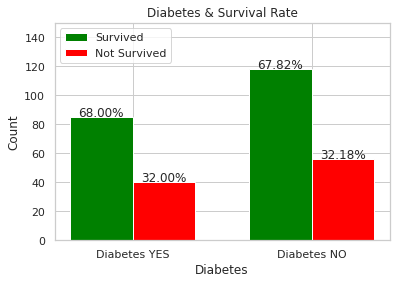

In [16]:
#Variables of Diabetes distribution
d_yes = ds[ds["diabetes"] == 1]
d_no = ds[ds["diabetes"] == 0]

d_yes_count = len(d_yes)
d_no_count = len(d_no)

#Variables of Diabetes wrt Survival Rate
d_yes_survived = d_yes[ds["DEATH_EVENT"] == 0]
d_yes_not_survived = d_yes[ds["DEATH_EVENT"] == 1]
d_no_survived = d_no[ds["DEATH_EVENT"] == 0]
d_no_not_survived = d_no[ds["DEATH_EVENT"] == 1]

d_yes_survived_count = len(d_yes_survived)
d_yes_not_survived_count = len(d_yes_not_survived)
d_no_survived_count = len(d_no_survived)
d_no_not_survived_count = len(d_no_not_survived)

# Data
categories = ['Diabetes YES', 'Diabetes NO']
survived = [d_yes_survived_count, d_no_survived_count]
not_survived = [d_yes_not_survived_count, d_no_not_survived_count]

total_survived = [survived[i] + not_survived[i] for i in range(len(categories))]

# Calculated the percentage values
survived_percentage = [(survived[i] / total_survived[i]) * 100 for i in range(len(categories))]
not_survived_percentage = [(not_survived[i] / total_survived[i]) * 100 for i in range(len(categories))]

bar_width = 0.35
bar_positions = range(len(categories))

# Grouped bar chart
plt.bar(bar_positions, survived, bar_width, label='Survived', color='green')
plt.bar([pos + bar_width for pos in bar_positions], not_survived, bar_width, label='Not Survived', color='red')

# Vertical offsets for each bar
offsets = [0.4, 0.4, 0.4, 0.4]
for i in range(len(categories)):
    # Adjusting the vertical position 
    plt.text(bar_positions[i], survived[i] + offsets[i], f'{survived_percentage[i]:.2f}%', ha='center')
    plt.text(bar_positions[i] + bar_width, not_survived[i] + offsets[i], f'{not_survived_percentage[i]:.2f}%', ha='center')

    
plt.ylim(0, 150)

plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes & Survival Rate')
plt.xticks([pos + bar_width/2 for pos in bar_positions], categories)
plt.legend(loc='upper left')
plt.show()


### Insight 7:
#### 1. Out of the total population (299), around 42%(126) of them suffer with diabetes, as seen in the start of the project.
#### 2. Amongst these 126 people, 68%(86) survived the event of a heart failure while 32%(40) succumbed to the condition.
#### 3. Amongst the 58%(173) population that do not have diabetes, 67.82%(117) survived the event of a heart failure while 32.18%(56) succumbed to the condition.

### 1.g. Effect of Anemia on Survival rate

<ipython-input-17-67686a7925f5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_yes_survived = a_yes[ds["DEATH_EVENT"] == 0]
<ipython-input-17-67686a7925f5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_yes_not_survived = a_yes[ds["DEATH_EVENT"] == 1]
<ipython-input-17-67686a7925f5>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_no_survived = a_no[ds["DEATH_EVENT"] == 0]
<ipython-input-17-67686a7925f5>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_no_not_survived = a_no[ds["DEATH_EVENT"] == 1]


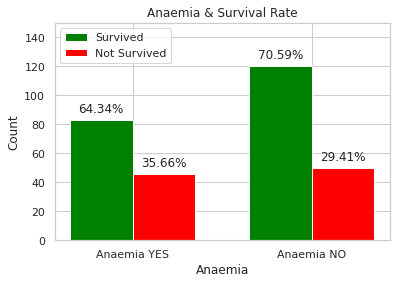

In [17]:
#Variables of Anaemia distribution
a_yes = ds[ds["anaemia"] == 1]
a_no = ds[ds["anaemia"] == 0]

a_yes_count = len(a_yes)
a_no_count = len(a_no)

#Variables of Anaemia wrt Survival Rate
a_yes_survived = a_yes[ds["DEATH_EVENT"] == 0]
a_yes_not_survived = a_yes[ds["DEATH_EVENT"] == 1]
a_no_survived = a_no[ds["DEATH_EVENT"] == 0]
a_no_not_survived = a_no[ds["DEATH_EVENT"] == 1]

a_yes_survived_count = len(a_yes_survived)
a_yes_not_survived_count = len(a_yes_not_survived)
a_no_survived_count = len(a_no_survived)
a_no_not_survived_count = len(a_no_not_survived)

# Data
categories = ['Anaemia YES', 'Anaemia NO']
survived = [a_yes_survived_count, a_no_survived_count]
not_survived = [a_yes_not_survived_count, a_no_not_survived_count]

total_survived = [survived[i] + not_survived[i] for i in range(len(categories))]

# Calculated the percentage values
survived_percentage = [(survived[i] / total_survived[i]) * 100 for i in range(len(categories))]
not_survived_percentage = [(not_survived[i] / total_survived[i]) * 100 for i in range(len(categories))]

bar_width = 0.35
bar_positions = range(len(categories))

# Grouped bar chart
plt.bar(bar_positions, survived, bar_width, label='Survived', color='green')
plt.bar([pos + bar_width for pos in bar_positions], not_survived, bar_width, label='Not Survived', color='red')

for i in range(len(categories)):
    # Adjusting the vertical position 
    plt.text(bar_positions[i], survived[i] + 5, f'{survived_percentage[i]:.2f}%', ha='center')
    plt.text(bar_positions[i] + bar_width, not_survived[i] + 5, f'{not_survived_percentage[i]:.2f}%', ha='center')
    
plt.ylim(0, 150)

plt.xlabel('Anaemia')
plt.ylabel('Count')
plt.title('Anaemia & Survival Rate')
plt.xticks([pos + bar_width/2 for pos in bar_positions], categories)
plt.legend(loc='upper left')
plt.show()


### Insight 8:
#### 1. Out of the total population (299), around 43%(129) of them have Anaemia, as seen in the start of the project.
#### 2. Amongst these 129 people, 64.34%(83) survived the event of a heart failure while 35.66%(46) succumbed to the condition.
#### 3. Amongst the 57%(170) population that do not have Anaemia, 70.59%(120) survived the event of a heart failure while 29.41%(50) succumbed to the condition.

### 1.h. Effect of Smoking on Death Event

<ipython-input-18-067a52d3a7a6>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s_yes_survived = s_yes[ds["DEATH_EVENT"] == 0]
<ipython-input-18-067a52d3a7a6>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s_yes_not_survived = s_yes[ds["DEATH_EVENT"] == 1]
<ipython-input-18-067a52d3a7a6>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s_no_survived = s_no[ds["DEATH_EVENT"] == 0]
<ipython-input-18-067a52d3a7a6>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s_no_not_survived = s_no[ds["DEATH_EVENT"] == 1]


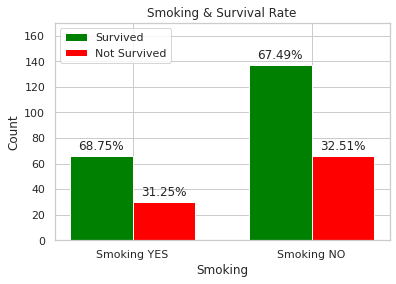

In [18]:
#Variables of Smoking distribution
s_yes = ds[ds["smoking"] == 1]
s_no = ds[ds["smoking"] == 0]

s_yes_count = len(s_yes)
s_no_count = len(s_no)

#Variables of Smoking wrt Survival Rate
s_yes_survived = s_yes[ds["DEATH_EVENT"] == 0]
s_yes_not_survived = s_yes[ds["DEATH_EVENT"] == 1]
s_no_survived = s_no[ds["DEATH_EVENT"] == 0]
s_no_not_survived = s_no[ds["DEATH_EVENT"] == 1]

s_yes_survived_count = len(s_yes_survived)
s_yes_not_survived_count = len(s_yes_not_survived)
s_no_survived_count = len(s_no_survived)
s_no_not_survived_count = len(s_no_not_survived)

# Data
categories = ['Smoking YES', 'Smoking NO']
survived = [s_yes_survived_count, s_no_survived_count]
not_survived = [s_yes_not_survived_count, s_no_not_survived_count]

total_survived = [survived[i] + not_survived[i] for i in range(len(categories))]

# Calculated the percentage values
survived_percentage = [(survived[i] / total_survived[i]) * 100 for i in range(len(categories))]
not_survived_percentage = [(not_survived[i] / total_survived[i]) * 100 for i in range(len(categories))]

bar_width = 0.35
bar_positions = range(len(categories))

# Grouped bar chart
plt.bar(bar_positions, survived, bar_width, label='Survived', color='green')
plt.bar([pos + bar_width for pos in bar_positions], not_survived, bar_width, label='Not Survived', color='red')

for i in range(len(categories)):
    # Adjusting the vertical position 
    plt.text(bar_positions[i], survived[i] + 5, f'{survived_percentage[i]:.2f}%', ha='center')
    plt.text(bar_positions[i] + bar_width, not_survived[i] + 5, f'{not_survived_percentage[i]:.2f}%', ha='center')
    
plt.ylim(0, 170)

plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Smoking & Survival Rate')
plt.xticks([pos + bar_width/2 for pos in bar_positions], categories)
plt.legend(loc='upper left')
plt.show()


### Insight 9:
#### 1. Out of the total population (299), around 32%(96) of them Smoke, as seen in the start of the project.
#### 2. Amongst these 96 people, 68.75%(66) survived the event of a heart failure while 31.25%(30) succumbed to the condition.
#### 3. Amongst the 68%(203) population that do not Smoke, 67.49%(137) survived the event of a heart failure while 32.51%(66) succumbed to the condition.
#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Quantitative Variables
##### 2.a.  Creatinine phosphokinase
##### 2.b. Ejection Fraction
##### 2.c. Platelets
##### 2.d. Serum Creatinine
##### 2.e. Serum Sodium

### 2.a. Creatinine Phosphokinase w.r.t. Survival Rate

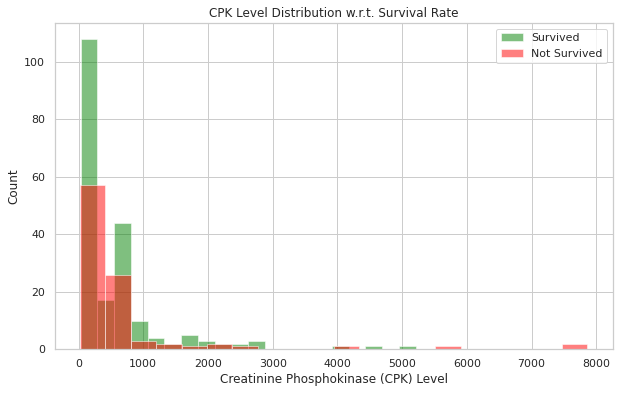

In [19]:
# Separate data into two groups based on survival
survived = ds[ds['DEATH_EVENT'] == 0]
not_survived = ds[ds['DEATH_EVENT'] == 1]

# Create a histogram for CPK levels
plt.figure(figsize=(10, 6))
plt.hist(survived['creatinine_phosphokinase'], bins=20, alpha=0.5, label='Survived', color='green')
plt.hist(not_survived['creatinine_phosphokinase'], bins=20, alpha=0.5, label='Not Survived', color='red')
plt.xlabel('Creatinine Phosphokinase (CPK) Level')
plt.ylabel('Count')
plt.legend()
plt.title('CPK Level Distribution w.r.t. Survival Rate')
plt.show()


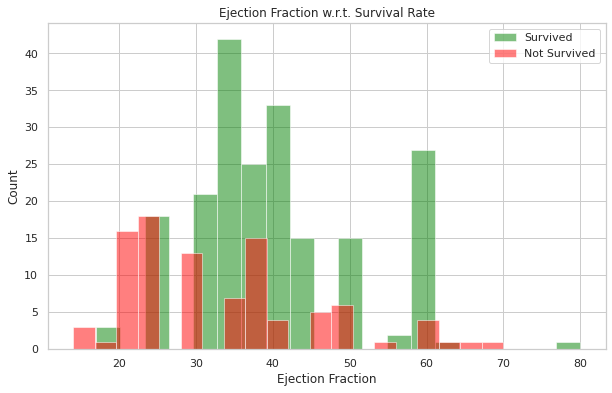

In [20]:
# Separate data into two groups based on survival
survived = ds[ds['DEATH_EVENT'] == 0]
not_survived = ds[ds['DEATH_EVENT'] == 1]

# Create a histogram for CPK levels
plt.figure(figsize=(10, 6))
plt.hist(survived['ejection_fraction'], bins=20, alpha=0.5, label='Survived', color='green')
plt.hist(not_survived['ejection_fraction'], bins=20, alpha=0.5, label='Not Survived', color='red')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.legend()
plt.title('Ejection Fraction w.r.t. Survival Rate')
plt.show()


### Insight: 
#### Majority of the person who succumbed to the heart failure condition showed lower than normal ejection fraction values. Only 25-45 (%) of the blood was being pumped out of the heart.

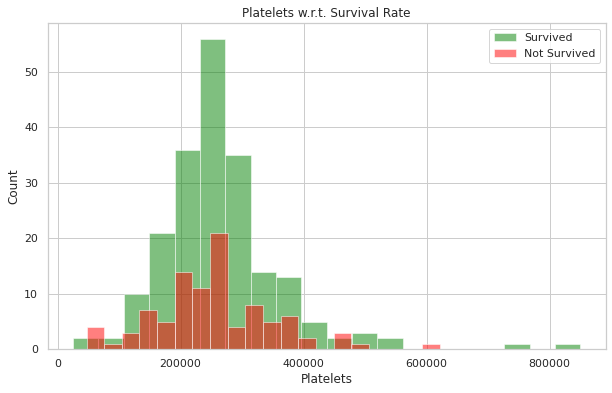

In [21]:
# Separate data into two groups based on survival
survived = ds[ds['DEATH_EVENT'] == 0]
not_survived = ds[ds['DEATH_EVENT'] == 1]

# Create a histogram for CPK levels
plt.figure(figsize=(10, 6))
plt.hist(survived['platelets'], bins=20, alpha=0.5, label='Survived', color='green')
plt.hist(not_survived['platelets'], bins=20, alpha=0.5, label='Not Survived', color='red')
plt.xlabel('Platelets')
plt.ylabel('Count')
plt.legend()
plt.title('Platelets w.r.t. Survival Rate')
plt.show()


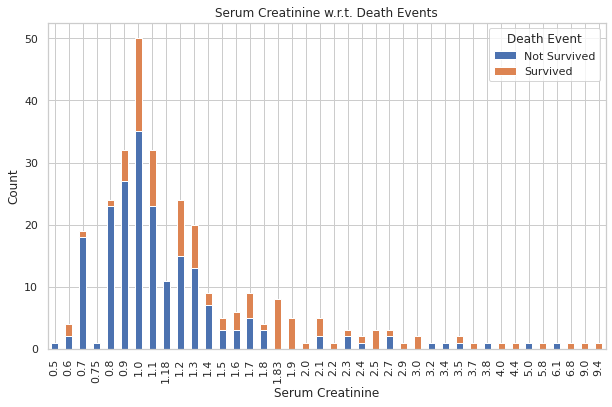

In [22]:
import matplotlib.pyplot as plt

# Group data by 'Serum Creatinine' and 'DEATH_EVENT'
grouped = ds.groupby(['serum_creatinine', 'DEATH_EVENT']).size().unstack()

# Create a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.title('Serum Creatinine w.r.t. Death Events')

# Add a legend
plt.legend(title='Death Event', labels=['Not Survived', 'Survived'])

# Show the plot
plt.show()


### Insight:


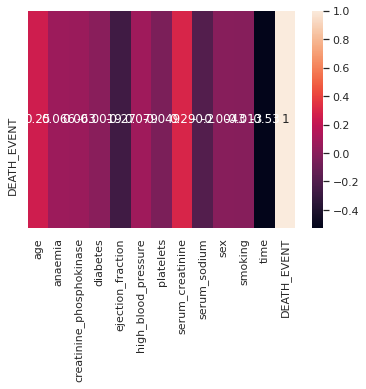

In [23]:
sns.heatmap(ds.corr().tail(1),annot=True)
plt.rcParams['figure.figsize']=(15,2)
plt.show()

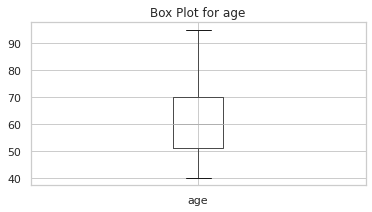

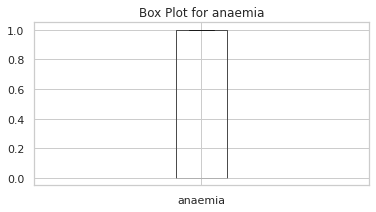

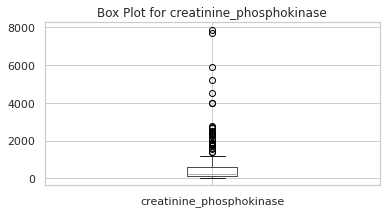

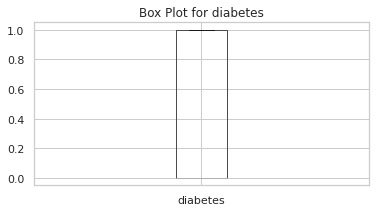

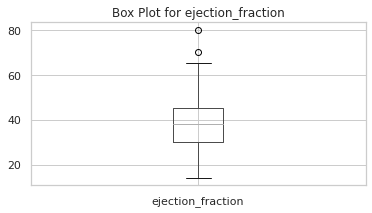

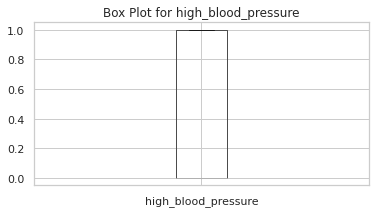

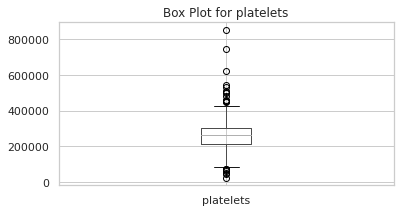

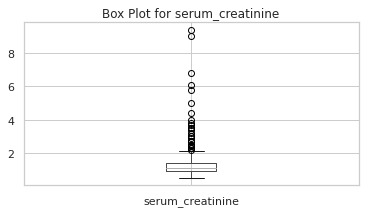

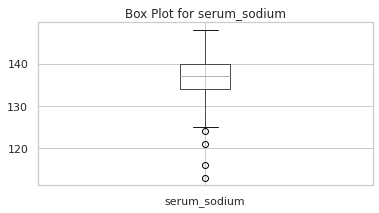

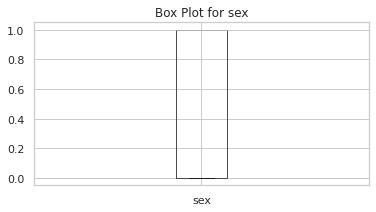

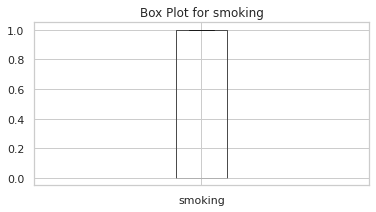

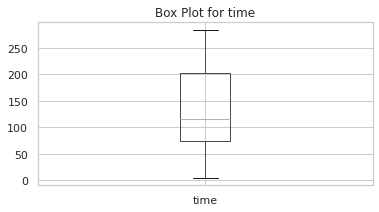

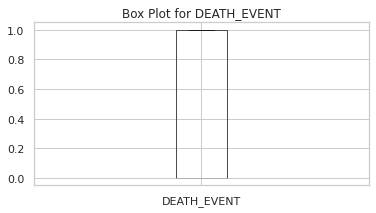

In [24]:

for column in ds.columns:
    # Create a box plot for the current column
    plt.figure(figsize=(6, 3))  # Set the desired figure size
    plt.title(f'Box Plot for {column}')
    ds.boxplot(column=column)
    plt.show()


In [25]:
# Define the columns for which you want to find outliers
columns_to_check = ['serum_creatinine', 'serum_sodium', 'ejection_fraction','platelets','creatinine_phosphokinase']

for column_name in columns_to_check:
    # Calculate the IQR (Interquartile Range)
    Q1 = ds[column_name].quantile(0.25)
    Q3 = ds[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers for the current column
    outliers = ds[(ds[column_name] < lower_bound) | (ds[column_name] > upper_bound)][column_name]

    # Print the outliers for the current column
    print(f"Outliers for {column_name}:")
    print(outliers)
    print(f"Total number of outliers for {column_name}: {len(outliers)}")
    print()


Outliers for serum_creatinine:
4      2.7
9      9.4
10     4.0
28     5.8
31     3.0
35     3.5
38     2.3
39     3.0
48     4.4
52     6.8
54     2.2
56     2.7
61     2.3
65     2.9
82     2.5
104    2.3
117    3.2
124    3.7
129    3.4
131    6.1
150    2.5
167    2.4
183    2.5
203    3.5
217    9.0
228    5.0
247    2.4
281    2.7
282    3.8
Name: serum_creatinine, dtype: float64
Total number of outliers for serum_creatinine: 29

Outliers for serum_sodium:
4      116
19     121
126    124
199    113
Name: serum_sodium, dtype: int64
Total number of outliers for serum_sodium: 4

Outliers for ejection_fraction:
64     80
217    70
Name: ejection_fraction, dtype: int64
Total number of outliers for ejection_fraction: 2

Outliers for platelets:
7      454000.0
15      47000.0
47     451000.0
55     461000.0
69     497000.0
105    621000.0
109    850000.0
117    507000.0
162    448000.0
163     75000.0
167     70000.0
200     73000.0
212    481000.0
224    504000.0
230     62000.0
240  

In [26]:
# Initialize a dictionary to store upper bounds
ds1=['serum_creatinine','serum_sodium','ejection_fraction','platelets','creatinine_phosphokinase']
upper_bounds = {}

# Calculate upper bounds for each variable
for variable in ds1:
    Q1 = np.percentile(ds[variable], 25)
    Q3 = np.percentile(ds[variable], 75)
    IQR = Q3 - Q1
    threshold = 1.5
    upper_bound = Q3 + threshold * IQR
    upper_bounds[variable] = upper_bound

# Print upper bounds for each variable
for variable, upper_bound in upper_bounds.items():
    print(f"Upper Bound for {variable}: {upper_bound}")


Upper Bound for serum_creatinine: 2.1499999999999995
Upper Bound for serum_sodium: 149.0
Upper Bound for ejection_fraction: 67.5
Upper Bound for platelets: 440000.0
Upper Bound for creatinine_phosphokinase: 1280.25


In [27]:
def treat_outliers(df, variable_name, threshold=1.5, treat_lower=True, treat_upper=True):
    variable = df[variable_name]
    Q1 = np.percentile(variable, 25)
    Q3 = np.percentile(variable, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    treated_data = variable.copy()
    
    if treat_lower:
        treated_data = np.where(variable < lower_bound, np.median(variable), treated_data)
    
    if treat_upper:
        treated_data = np.where(variable > upper_bound, np.median(variable), treated_data)
    
    return treated_data

In [28]:
ds['creatinine_phosphokinase']=treat_outliers(ds,'creatinine_phosphokinase')
ds['ejection_fraction']=treat_outliers(ds,'ejection_fraction')
ds['platelets']=treat_outliers(ds,'platelets')
ds['serum_creatinine']=treat_outliers(ds,'serum_creatinine')
ds['serum_sodium']=treat_outliers(ds,'serum_sodium')

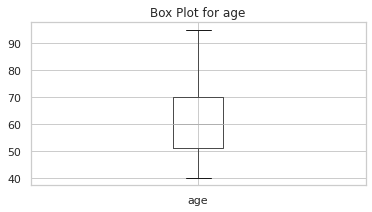

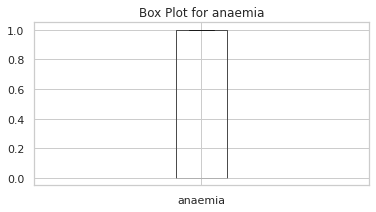

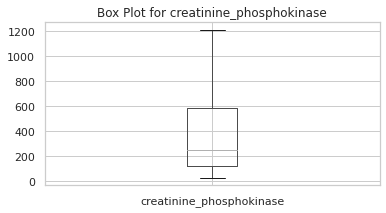

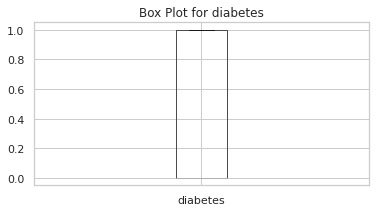

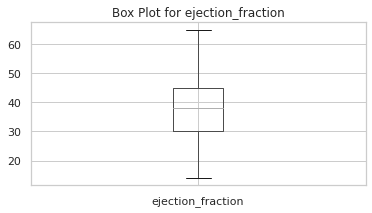

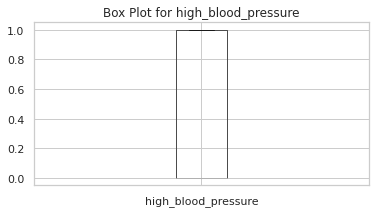

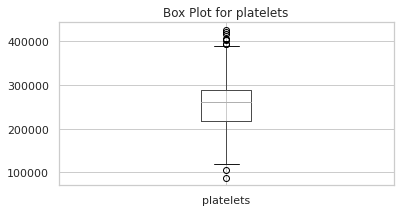

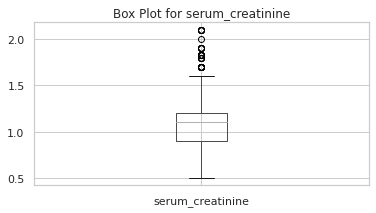

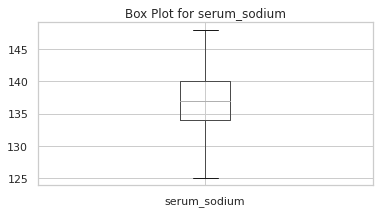

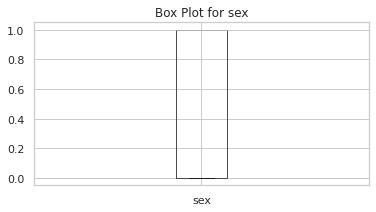

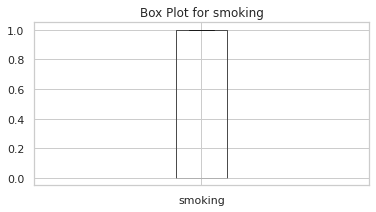

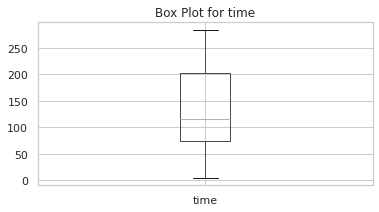

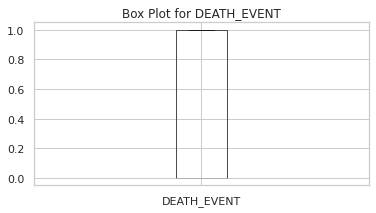

In [29]:
for columns in ds.columns:
    # Create a box plot for the current column
    plt.figure(figsize=(6, 3))  # Set the desired figure size
    plt.title(f'Box Plot for {columns}')
    ds.boxplot(column=columns)
    plt.show()


In [ ]:
# Created a neww filtered csv file for the selected relevant features, but got deleted bymistake. That dataset contains only relevant features and the outliers have also been removed  that had been removed 

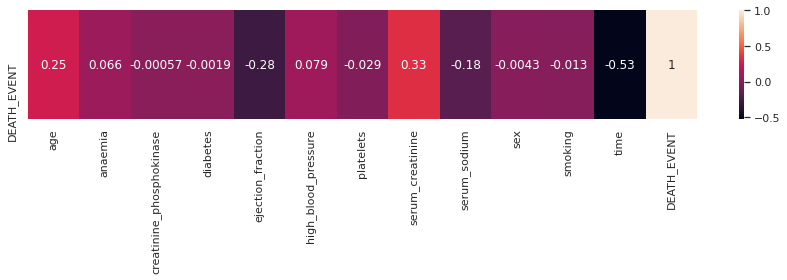

In [30]:
sns.heatmap(ds.corr().tail(1),annot=True)
plt.rcParams['figure.figsize']=(15,2)
plt.show()

In [32]:
corr_with_death_event = ds.corr()['DEATH_EVENT']
corr_with_death_event = corr_with_death_event[(corr_with_death_event.abs() > 0.2) & (corr_with_death_event.abs() != 1)]
print(corr_with_death_event)

age                  0.253729
ejection_fraction   -0.283244
serum_creatinine     0.327965
time                -0.526964
Name: DEATH_EVENT, dtype: float64


### * Final insight: 4 features : Age, ejection fraction, serum_creatinine and time, seem to be correlated to the dependent variable as compared to the other features, and hence relevant too. *